Level  | Segment Count   | Total Length   
---------------------------------------------
0      | 1               | 1.00000        
1      | 4               | 1.33333        
2      | 16              | 1.77778        
3      | 64              | 2.37037        
4      | 256             | 3.16049        
5      | 1024            | 4.21399        
6      | 4096            | 5.61866        
7      | 16384           | 7.49154        
8      | 65536           | 9.98872        
9      | 262144          | 13.31829       
10     | 1048576         | 17.75773       


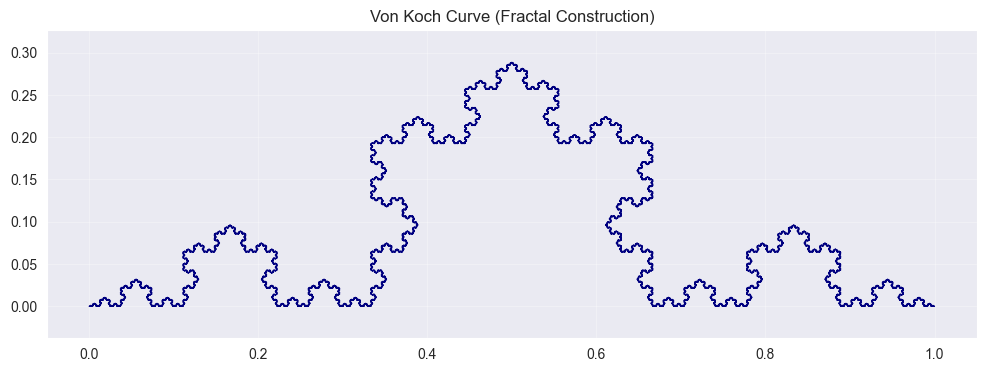

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import time

# 1. Helper: The Rotation Logic
def get_triangle_tip(p1, p2):
    """
    Given a segment from p1 to p2, calculates the tip of the equilateral triangle
    that would sit on the middle third.
    """
    # Unpack coordinates
    x1, y1 = p1
    x2, y2 = p2

    # Calculate the vector of the full segment
    dx = x2 - x1
    dy = y2 - y1

    # The tip is located at: Start + 1/3*(Vector) + Rotation(1/3*Vector)
    # But an easier geometric way is using a 60-degree rotation matrix on the base.

    # First, find the "base" points (1/3 and 2/3 marks)
    p_1_3 = (x1 + dx/3, y1 + dy/3)
    p_2_3 = (x1 + 2*dx/3, y1 + 2*dy/3)

    # Now rotate the vector (p_2_3 - p_1_3) by -60 degrees (or +60 depending on orientation)
    # Standard Koch bumps "out" (counter-clockwise relative to the line)

    # Vector of the middle third
    vx = p_2_3[0] - p_1_3[0]
    vy = p_2_3[1] - p_1_3[1]

    # Rotation formula for 60 degrees (pi/3)
    # x' = x cos(60) - y sin(60)
    # y' = x sin(60) + y cos(60)
    theta = np.pi / 3
    rx = vx * np.cos(theta) - vy * np.sin(theta)
    ry = vx * np.sin(theta) + vy * np.cos(theta)

    top_point = (p_1_3[0] + rx, p_1_3[1] + ry)

    return p_1_3, top_point, p_2_3

# 2. Generator
def generate_koch_curve(iterations):
    # Start with a line from (0,0) to (1,0)
    # We store points in order. A single list of points connects the whole curve.
    points = [(0.0, 0.0), (1.0, 0.0)]

    print(f"{'Level':<6} | {'Segment Count':<15} | {'Total Length':<15}")
    print("-" * 45)
    print(f"{0:<6} | {1:<15} | {1.0:<15.5f}")

    for i in range(1, iterations + 1):
        new_points = []
        # We iterate through PAIRS of points (segments)
        # If points are [A, B, C], segments are (A,B) and (B,C)

        for j in range(len(points) - 1):
            p1 = points[j]
            p2 = points[j+1]

            # Get the 3 intermediate points:
            # (1/3 mark), (Triangle Tip), (2/3 mark)
            a, b, c = get_triangle_tip(p1, p2)

            # Add p1 and the new intermediate points
            # We don't add p2 yet, it will be p1 for the next segment
            new_points.extend([p1, a, b, c])

        # Add the very last point of the curve
        new_points.append(points[-1])

        points = new_points

        # Calculate Stats
        # Math shortcut: Length multiplies by 4/3 every time
        current_len = (4/3)**i
        seg_count = len(points) - 1
        print(f"{i:<6} | {seg_count:<15} | {current_len:<15.5f}")

    return points

# 3. Visualization
def plot_koch(points):
    x_vals, y_vals = zip(*points)

    plt.figure(figsize=(12, 4))
    plt.plot(x_vals, y_vals, color='navy', linewidth=0.8)
    plt.title("Von Koch Curve (Fractal Construction)")
    plt.axis('equal') # Crucial to see the equilateral triangles correctly
    plt.grid(True, alpha=0.3)
    plt.show()

# --- Run ---
# 5 to 6 iterations is usually the sweet spot for visualization
curve_points = generate_koch_curve(10)
plot_koch(curve_points)
